<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/analisis-data-dengan-python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Helmy Purnomo Hidayat]
- **Email:** [helmypurnomo234@gmail.com]
- **ID Dicoding:** [Helmy Purnomo Hidayat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan harian berdasarkan nilai pembayaran?
- Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

## Import Semua Packages/Library yang Digunakan

In [32]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import requests
import io


## Data Wrangling

### Gathering Data

In [33]:
def load_data_from_github(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df


###Dataset yang digunakan

In [34]:
customers_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv'
orders_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv'
payments_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv'


**Insight:**
- Dataset dari URL ini digunakan untuk menganalisis tren penjualan dan metode pembayaran dalam platform e-commerce.
- Data diambil dari tiga file CSV yang berisi informasi pelanggan, pesanan, dan pembayaran.

### Assessing Data

In [35]:
def load_and_clean_data():
    try:
        # Load data
        customers = load_data_from_github(customers_url)
        orders = load_data_from_github(orders_url)
        payments = load_data_from_github(payments_url)

        # Gabungkan dataset
        merged_data = pd.merge(customers, orders, on='customer_id')
        merged_data = pd.merge(merged_data, payments, on='order_id')

        # Data cleaning
        merged_data = merged_data.dropna()
        merged_data = merged_data.drop_duplicates()
        merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

        # Menghapus outlier pada payment_value
        Q1 = merged_data['payment_value'].quantile(0.25)
        Q3 = merged_data['payment_value'].quantile(0.75)
        IQR = Q3 - Q1
        merged_data = merged_data[(merged_data['payment_value'] >= Q1 - 1.5 * IQR) &
                                  (merged_data['payment_value'] <= Q3 + 1.5 * IQR)]

        return merged_data
    except Exception as e:
        print(f"Terjadi kesalahan saat memuat atau membersihkan data: {str(e)}")
        return None


**Insight:**
- Data telah dibersihkan dengan menghapus missing values dan duplikat.
- Outlier pada kolom payment_value dihapus menggunakan Interquartile Range (IQR).
- Kolom tanggal pesanan (order_purchase_timestamp) dikonversi ke format datetime untuk memudahkan analisis berbasis waktu.

### CLEANING DATA

In [39]:
data = load_and_clean_data()

if data is not None:
    start_date = data['order_purchase_timestamp'].min().date()
    end_date = data['order_purchase_timestamp'].max().date()

    filtered_data = data[(data['order_purchase_timestamp'].dt.date >= start_date) &
                         (data['order_purchase_timestamp'].dt.date <= end_date)]


**Insight:**
- Data dibatasi pada rentang waktu tertentu dari tanggal paling awal hingga tanggal paling akhir dalam dataset.
- Hal ini memastikan bahwa analisis dilakukan hanya pada data yang relevan dalam rentang waktu tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penjualan harian selama periode yang dipilih?


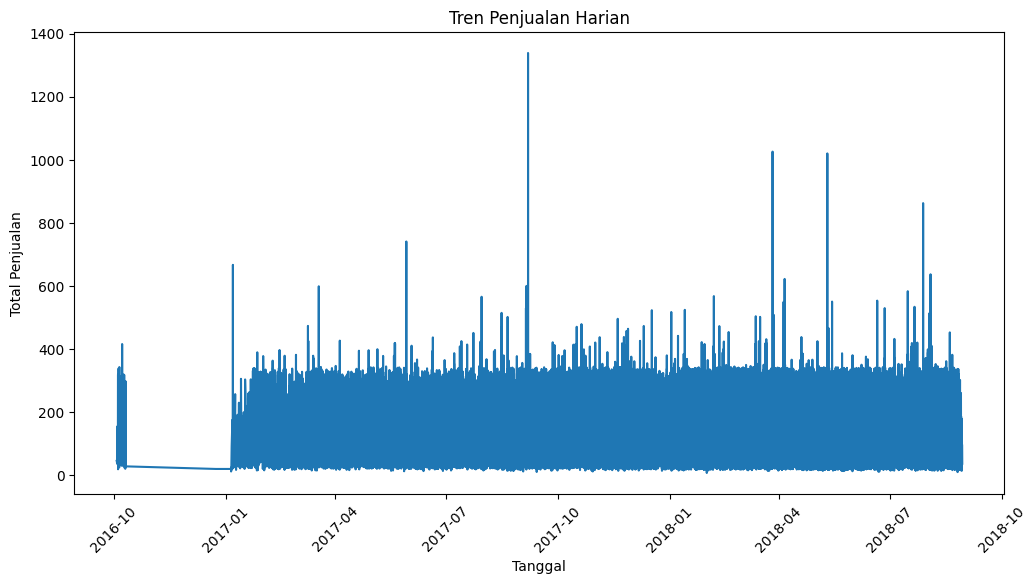

In [37]:
    daily_sales = filtered_data.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_purchase_timestamp'], daily_sales['payment_value'])
    plt.xlabel('Tanggal')
    plt.ylabel('Total Penjualan')
    plt.title('Tren Penjualan Harian')
    plt.xticks(rotation=45)
    plt.show()


### Pertanyaan 2:Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

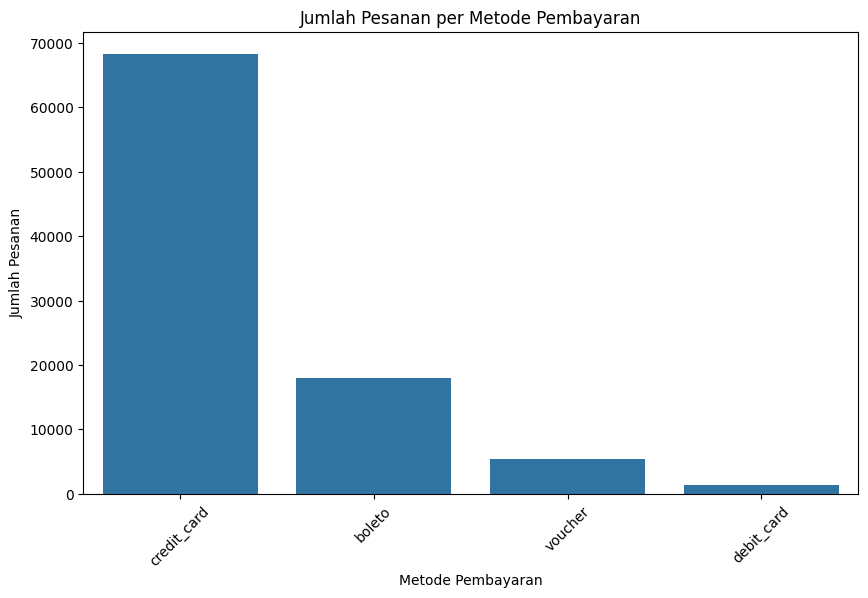

In [38]:
    payment_counts = filtered_data['payment_type'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=payment_counts.index, y=payment_counts.values)
    plt.xlabel('Metode Pembayaran')
    plt.ylabel('Jumlah Pesanan')
    plt.title('Jumlah Pesanan per Metode Pembayaran')
    plt.xticks(rotation=45)
    plt.show()


**Insight:**
- Kita bisa melihat metode pembayaran yang paling sering digunakan.
- Ini membantu mengetahui preferensi pelanggan terkait cara pembayaran.
 xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:Dari hasil analisis, terlihat adanya fluktuasi dalam tren penjualan harian. Puncak penjualan dapat diamati pada beberapa hari tertentu.
- Conclution pertanyaan 2:Metode pembayaran tertentu lebih sering digunakan dibanding metode lainnya, menunjukkan preferensi pelanggan terhadap metode pembayaran tertentu.